In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.3 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

import transformers
from transformers import BertTokenizer

In [4]:
import matplotlib.pyplot as plt

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [6]:
data = pd.read_csv('/content/drive/MyDrive/data/text_to_sentence.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279057 entries, 0 to 279056
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   column_num  279057 non-null  int64 
 1   sentence    279057 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


In [8]:
data_len = []

In [13]:
df = pd.DataFrame({"col":[]})
df.head()

,col


In [14]:
def find(sentence): 
  # For every sentence...
  for i, sent in enumerate(sentence):

      input_ids = tokenizer.encode(sent, add_special_tokens=True)
      if len(input_ids) >= 50:
       df.loc[df.index.max() + 1 if len(df) > 0 else 0, "col"] = i
      #data_len.append(len(input_ids))

In [15]:
find(data.sentence)

Token indices sequence length is longer than the specified maximum sequence length for this model (529 > 512). Running this sequence through the model will result in indexing errors


In [16]:
df.head()

,col
0,62.0
1,153.0
2,302.0
3,502.0
4,516.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279057 entries, 0 to 279056
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   column_num  279057 non-null  int64 
 1   sentence    279057 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 0 to 2281
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     2282 non-null   float64
dtypes: float64(1)
memory usage: 100.2 KB


In [19]:
df.head()

,col
0,62.0
1,153.0
2,302.0
3,502.0
4,516.0


In [20]:
data2 = data[~data.index.isin(df['col'])]

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276775 entries, 0 to 279056
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   column_num  276775 non-null  int64 
 1   sentence    276775 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [22]:
data2.to_csv('/content/drive/MyDrive/data/text_to_sentence_under50.csv', index=False)

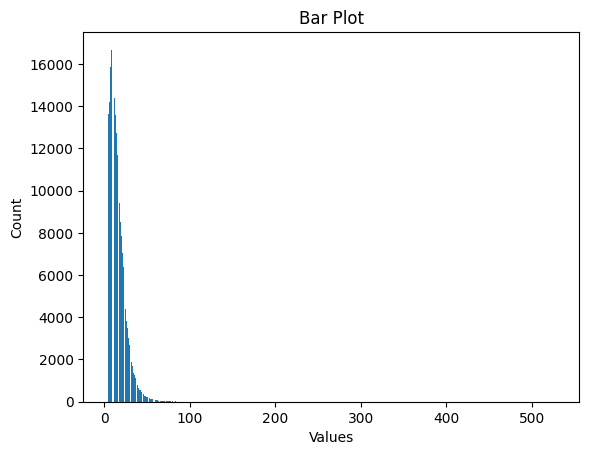

In [ ]:
x = list(set(data_len))
y = [data_len.count(value) for value in x]

# Create the bar plot
plt.bar(x, y)

# Optional: Add labels and title
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar Plot')

# Display the plot
plt.show()

In [ ]:
print(sum(1 for value in data_len if value > 50))

2086


In [ ]:
data_len2 = [value for value in data_len if value < 50]

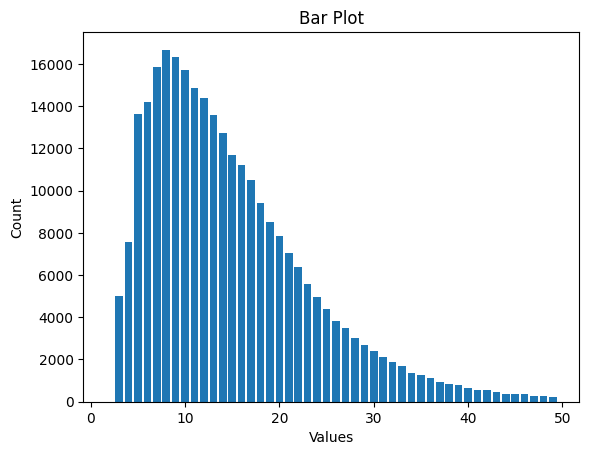

In [ ]:
x = list(set(data_len2))
y = [data_len2.count(value) for value in x]

# Create the bar plot
plt.bar(x, y)

# Optional: Add labels and title
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar Plot')

# Display the plot
plt.show()